# About this notebook 

In this notebook we are going to explore the dataset in https://www.kaggle.com/sulianova/cardiovascular-disease-dataset .
The dataset maps the cardiac condition of several patients (70k). We are also going to try a logistic regression to predict
if a given patient have a cardiovascular disease.

# Table of contents

* Importing and reading the data
* Feature analysis
* Cleaning the data
* Exploratory data analysis
* Logistic regression
* Notes



What is the plan?

Of course we need to first read the data and see the basic information there. Then we can see the distribution of each feature in the data and compare the distributions between 'gender' =1 and =2 and 'cardio' =0 and =1, taking notes as we go.
To do the logistic regression we are going to use the sklearn package. 

# Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score


data=pd.read_csv('../input/cardiovascular-disease-dataset/cardio_train.csv'
                 ,sep=';'#';' separates the data
                 )

# Feature analysis

In [2]:
data['age']=data['age']/365 #the date were in days
data.head()







,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


All of the dataset values were collected at the moment of medical examination.


Here we can se some usefull information, like:
* The mean age is 53.3 years and the youngest patient is almost 30 years old
* The "mean" of gender is 1.3 (1 - women, 2 - men) which means there is more women in the dataset than men
* The mean of the height is 164 cm
* The mean of the weight is 74.2 kg 
* If the systolic and diastolic blood pressure are measured in mmHg, we shouldn't be getting negative minimum values, wich suggests some transcription errors. Also some values (visible from the data.head()) are beyond 120 mmHg for ap_hi and 80 mmHg for ap_lo , and that consitutes hypertension already.
* The maximum value of ap_lo and ap_hi is way too high to make any sense, so we better clean the impossible values
* The mean of smoke is 0.08, so few people in this dataset smokes, the same can be said for alcohol intake(0.05).
* The mean of active is 0.8 so a lot of people do regular physical exercise
* The mean of cardio is 0.499 so nearly half of the people in the dataset have some cardiovascular disease. This also means this dataset is balanced so we dont need to convert to a balanced dataset to do our machine learning algoritm.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


not a single value is missing(NaN)

# Data cleaning

In [5]:
data[data['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0


it would make sense if the negative values are all transcription errors since all values are in range of acceptable pressures except for the signal. We can just convert these negative values to positive and keep in the dataset. The same can be said for the ap_lo since:

In [6]:
data[data['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,61.838356,1,167,74.0,15,-70,1,1,0,0,1,1


In [7]:
data['ap_lo']=data['ap_lo'].abs()
data['ap_hi']=data['ap_hi'].abs()
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Lets define the values acceptable for the pressures:
* ap_hi have to be 10<ap_hi<220 
* ap_lo tave to be 10<ap_lo<190

In [8]:
data = data.loc[data['ap_lo']>10]
data = data.loc[data['ap_lo']<190]
data = data.loc[data['ap_hi']>10]
data = data.loc[data['ap_hi']<220]
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000
mean,49965.326487,53.324786,1.348680,164.361082,74.114295,126.296620,81.347418,1.364114,1.225834,0.087888,0.053583,0.803278,0.494836
std,28846.913585,6.762535,0.476556,8.195723,14.322016,17.542778,9.692376,0.678469,0.571788,0.283134,0.225194,0.397523,0.499977
min,0.000000,29.583562,1.000000,55.000000,11.000000,11.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24993.750000,48.372603,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50003.000000,53.972603,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74860.250000,58.419178,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,215.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We gave up little bit over a thousand values. Now we adjust the weight and drop the 'id' column.

In [9]:
data = data.loc[data['weight']>30]
data=data.drop(columns='id')
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000,68931.000000
mean,53.324771,1.348682,164.362290,74.120722,126.297979,81.348015,1.364118,1.225864,0.087885,0.053575,0.803253,0.494843
std,6.762407,0.476557,8.192527,14.311736,17.543298,9.692443,0.678492,0.571819,0.283130,0.225179,0.397543,0.499977
min,29.583562,1.000000,55.000000,31.000000,11.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.372603,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.972603,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.419178,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,215.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory data analysis
Now we need to look for diferences between populations. First lets see if anything changes between men and women.

Text(0.5, 1.0, 'smoke')

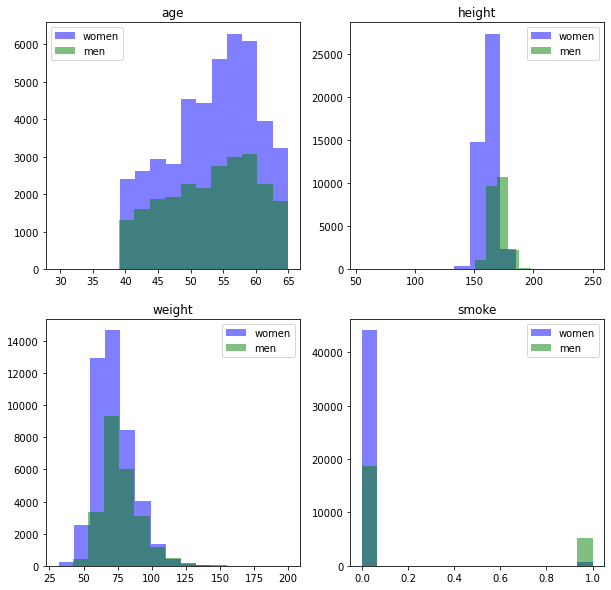

In [10]:
datam = data[data['gender']==2]
dataw = data[data['gender']==1]


fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].hist(dataw['age'], bins=15,alpha=0.5,color='blue')
axs[0, 0].hist(datam['age'], bins=15,alpha=0.5,color='green')
axs[0, 0].legend(['women','men'])
axs[0, 0].set_title('age')
axs[0, 1].hist(dataw['height'],bins=15, alpha=0.5,color='blue')
axs[0, 1].hist(datam['height'],bins=15, alpha=0.5,color='green')
axs[0, 1].legend(['women','men'])
axs[0, 1].set_title('height')
axs[1, 0].hist(dataw['weight'],bins=15, alpha=0.5,color='blue')
axs[1, 0].hist(datam['weight'],bins=15, alpha=0.5,color='green')
axs[1, 0].legend(['women','men'])
axs[1, 0].set_title('weight')
axs[1, 1].hist(dataw['smoke'],bins=15, alpha=0.5,color='blue')
axs[1, 1].hist(datam['smoke'],bins=15, alpha=0.5,color='green')
axs[1, 1].legend(['women','men'])
axs[1, 1].set_title('smoke')



Here we can see 
* The age distribution between men and women is nearly the same (there is just more women in the dataset)
* Men in this dataset is higher on the average than women
* The weight distribution is also the same for both men and women, and the gaussian have a skew to the right
* There is more men that smoke even considering there is more women in the dataset

In [11]:
print(dataw['weight'].skew(),
datam['weight'].skew()) # measure of skewness (>0:to the right ;=0 symmetrical ; <0 to the left)

m = datam['smoke'].sum() / datam.size # proportion of men that smoke
w = dataw['smoke'].sum() / dataw.size # proportion of women that smoke

print(w,m)

1.0487009716217728 1.0518089694501944
0.0014774887146590638 0.018244227168712296


So men are 12 times more smokers than women in this dataset

Text(0.5, 1.0, 'gluc')

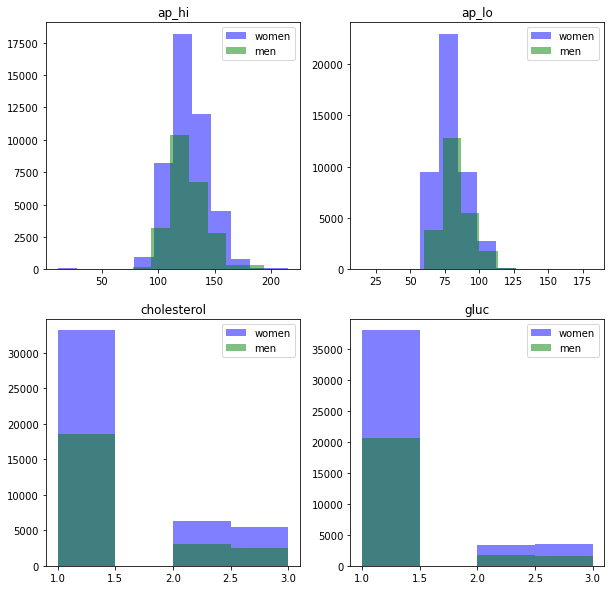

In [12]:

fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].hist(dataw['ap_hi'], bins=12, alpha=0.5,color='blue')
axs[0, 0].hist(datam['ap_hi'], bins=12, alpha=0.5,color='green')
axs[0, 0].legend(['women','men'])
axs[0, 0].set_title('ap_hi')

axs[0, 1].hist(dataw['ap_lo'],bins=12, alpha=0.5,color='blue')
axs[0, 1].hist(datam['ap_lo'],bins=12, alpha=0.5,color='green')
axs[0, 1].legend(['women','men'])
axs[0, 1].set_title('ap_lo')

axs[1, 0].hist(dataw['cholesterol'],bins=4, alpha=0.5,color='blue')
axs[1, 0].hist(datam['cholesterol'],bins=4, alpha=0.5,color='green')
axs[1, 0].legend(['women','men'])
axs[1, 0].set_title('cholesterol')

axs[1, 1].hist(dataw['gluc'],bins=4, alpha=0.5,color='blue')
axs[1, 1].hist(datam['gluc'],bins=4, alpha=0.5,color='green')
axs[1, 1].legend(['women','men'])
axs[1, 1].set_title('gluc')

The distributions for pressure, cholesterol and glucose are nearly the same for both men and women.Now the same for cardiovascular condition

Text(0.5, 1.0, 'smoke')

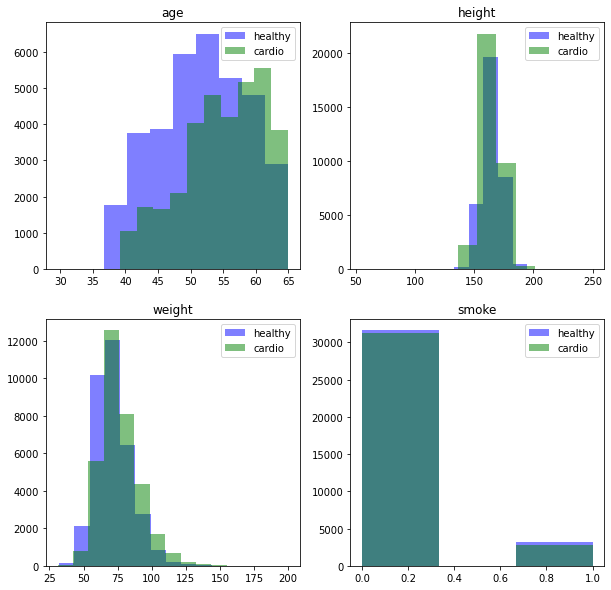

In [13]:
data0 = data[data['cardio']==0]
data1 = data[data['cardio']==1]


fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].hist(data0['age'], bins=10, alpha=0.5,color='blue')
axs[0, 0].hist(data1['age'], bins=10, alpha=0.5,color='green')
axs[0, 0].legend(['healthy','cardio'])
axs[0, 0].set_title('age')
axs[0, 1].hist(data0['height'],bins=12, alpha=0.5,color='blue')
axs[0, 1].hist(data1['height'],bins=12, alpha=0.5,color='green')
axs[0, 1].legend(['healthy','cardio'])
axs[0, 1].set_title('height')
axs[1, 0].hist(data0['weight'],bins=15, alpha=0.5,color='blue')
axs[1, 0].hist(data1['weight'],bins=15, alpha=0.5,color='green')
axs[1, 0].legend(['healthy','cardio'])
axs[1, 0].set_title('weight')
axs[1, 1].hist(data0['smoke'],bins=3, alpha=0.5,color='blue')
axs[1, 1].hist(data1['smoke'],bins=3, alpha=0.5,color='green')
axs[1, 1].legend(['healthy','cardio'])
axs[1, 1].set_title('smoke')

We can see that age is a important factor to predict a cardiovascular disease. 

Text(0.5, 1.0, 'gluc')

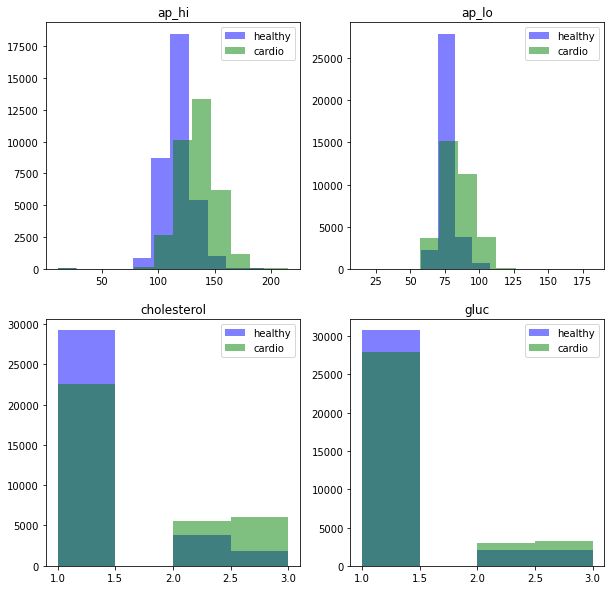

In [14]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].hist(data0['ap_hi'], bins=12, alpha=0.5,color='blue')
axs[0, 0].hist(data1['ap_hi'], bins=12, alpha=0.5,color='green')
axs[0, 0].legend(['healthy','cardio'])
axs[0, 0].set_title('ap_hi')

axs[0, 1].hist(data0['ap_lo'],bins=12, alpha=0.5,color='blue')
axs[0, 1].hist(data1['ap_lo'],bins=12, alpha=0.5,color='green')
axs[0, 1].legend(['healthy','cardio'])
axs[0, 1].set_title('ap_lo')

axs[1, 0].hist(data0['cholesterol'],bins=4, alpha=0.5,color='blue')
axs[1, 0].hist(data1['cholesterol'],bins=4, alpha=0.5,color='green')
axs[1, 0].legend(['healthy','cardio'])
axs[1, 0].set_title('cholesterol')

axs[1, 1].hist(data0['gluc'],bins=4, alpha=0.5,color='blue')
axs[1, 1].hist(data1['gluc'],bins=4, alpha=0.5,color='green')
axs[1, 1].legend(['healthy','cardio'])
axs[1, 1].set_title('gluc')

Here we can also indentify ap_hi, cholesterol and glucose as important factors

The correlation matrix...

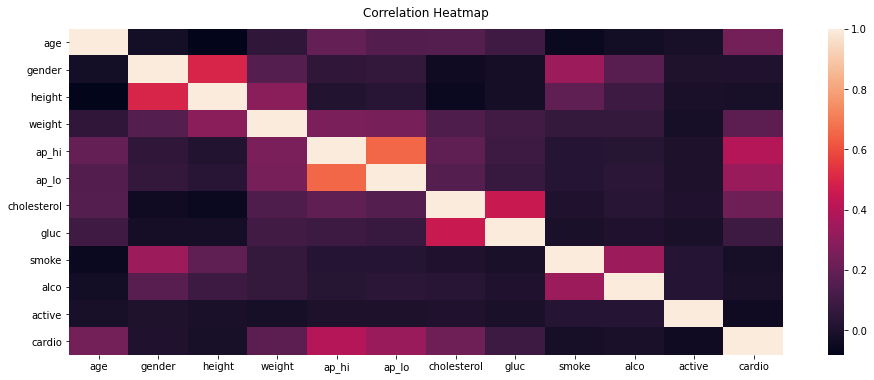

In [15]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr()).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


We can see that age,weight,ap_hi,ap_lo,cholesterol and gluc have the biggest correlation value with cardio. Now we can train a model to predict if a patient have some cardiovascular disease. For this run we are going with a logistic regression strategy.

# Logistic regression

The strategy here is to use the features : age,gender,height,weight,dyastolic and systolic pressures, cholesterol,glucose,smoke and active

For the training and validation, cross validation were used. 80% of the dataset were used to train and 20% to validade the model.



In [16]:
log_data=[data['age'],data['gender'],data['height'],data['weight'],data['ap_hi'],data['ap_lo'],data['cholesterol'],data['gluc'],data['smoke'],data['active']]
log_data=np.array(log_data)
log_data=log_data.transpose()
train_data,test_data,train_target,test_target = train_test_split(log_data, data['cardio'], test_size=0.2)


lr = LogisticRegression().fit(train_data,train_target)


p=lr.score(test_data,test_target)


print(p)


0.7129904982954958


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Notes

Here we explored a very superficial logistic regression. We could try neural networks, support vector machines etc.
We made some assumptions in the way and it would be nice to made them clear.



* The systolic and dyastolic pressures (columns ap_hi and ap_lo) were measured in mmHg
* The same pressures had sometimes negative values and other impossible ones (>1000). We made the assumptions that the negative ones were transcription errors. We dropped the super-large ones
* We also assumed a minimum weight of 30kg to be valid, and that may not be true if dwarfism cases were in the dataset
* We defined the acceptable intervals for the pressures to be 10<ap_hi<220 and 10<ap_lo<190, and this assumption was not based in any concrete reference (higher pressures may be possible)


This notebook was inspired by this work: https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python by Baligh Mnassri on the titanic dataset



